In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np
from scipy.stats import norm
from scipy import stats
plt.style.use("fivethirtyeight")

In [2]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
sample,features = train.shape[0],train.shape[1]
print(f"Train data contains {sample} rows and {features} columns")
train.head()

Train data contains 1460 rows and 81 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
sample,features = test.shape[0],test.shape[1]
print(f"Test data contains {sample} rows and {features} columns")
test.head()

Test data contains 1459 rows and 80 columns


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


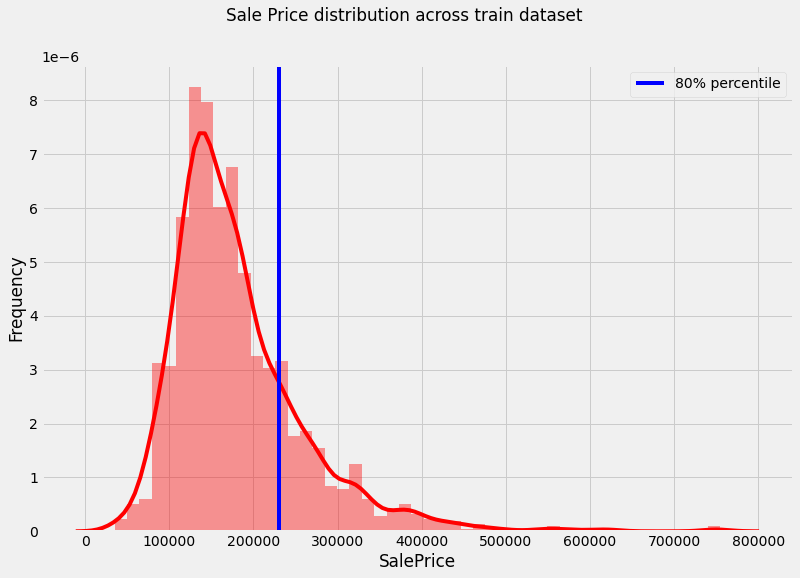

Above Distribution has 1.88 skewness values
Above Distribution has 6.54 kurtosis values


In [4]:
plt.figure(figsize = (12,8))
sns.distplot(train['SalePrice']
                ,color = 'r')
#plt.xlabel("Sale Price distribution across train dataset")
plt.ylabel("Frequency")
skewness = np.round(train['SalePrice'].skew(),2)
kurtosis = np.round(train['SalePrice'].kurt(),2)
plt.axvline(np.percentile(train['SalePrice'],80),color = 'blue',label = "80% percentile")
plt.suptitle(f"Sale Price distribution across train dataset")
plt.legend()
plt.show()

print(f"Above Distribution has {skewness} skewness values")
print(f"Above Distribution has {kurtosis} kurtosis values")

### So.... What do we analyze from above distribution and data

1. SalePrice features is not normally distributed, and can be clearly interpreted as right skewed as there is long tail in the right of the plot.

2. To check if above features is log normally distributed or not we are going to plot log values of SalePrice feature. If resulted distribution is normally distributed then we can take log(SalePrice) as target variable.

3. Positive Skewness values interpret that it's a right skewed distribution which is easilly proved looking above plot.

### Extra Info: Negative value determined it's a left skewed and zero value implies it's normally distributed.

4. Kurtosis just like skewness tells us about the shape of distribution and kurtosis value above 3 implies that tails of those distribution contains lot more information then normal distribution.

### Extra Info: If value is less than 3 it's states that information at the tails of the distribution is less than normal distribution.

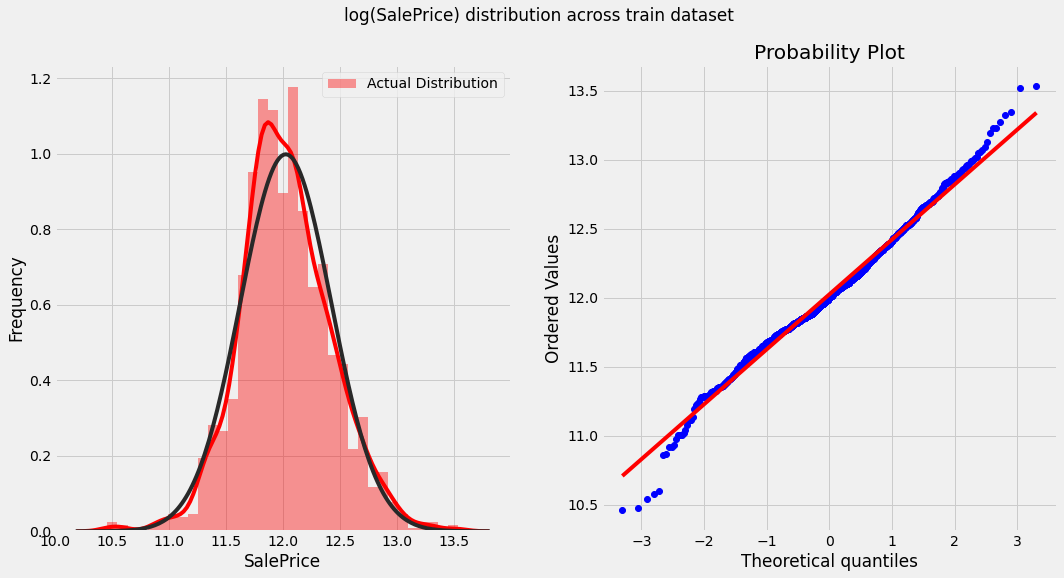

In [5]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.distplot(np.log(train['SalePrice'])
                ,color = 'r',label = "Actual Distribution",fit = norm)
#plt.xlabel("Sale Price distribution across train dataset")
plt.ylabel("Frequency")
plt.suptitle(f"log(SalePrice) distribution across train dataset")
plt.legend()

plt.subplot(1,2,2)
stats.probplot(np.log(train['SalePrice']),plot = plt)

plt.show()

Well....... Nothing can be more satisfying then above result. 

Our target variable Price started to form a normal distribution. This implies that SalePrice is a power law distribution as stated in previous section(2nd Point).

In [6]:
train['log(Price)'] = np.log(train['SalePrice']) # added one new feature which is going to be very useful in future sections 

## Let's dive into more features...........

#### We are going to see 3 more main numerical features and how related this features is with SalePrice:

1. 1stFlrSF : First Floor square feet
2. 2ndFlrSF : Second floor square feet
3. GrLivArea : Above grade (ground) living area square feet

#### Swoop into the indepth analysis of above features..........

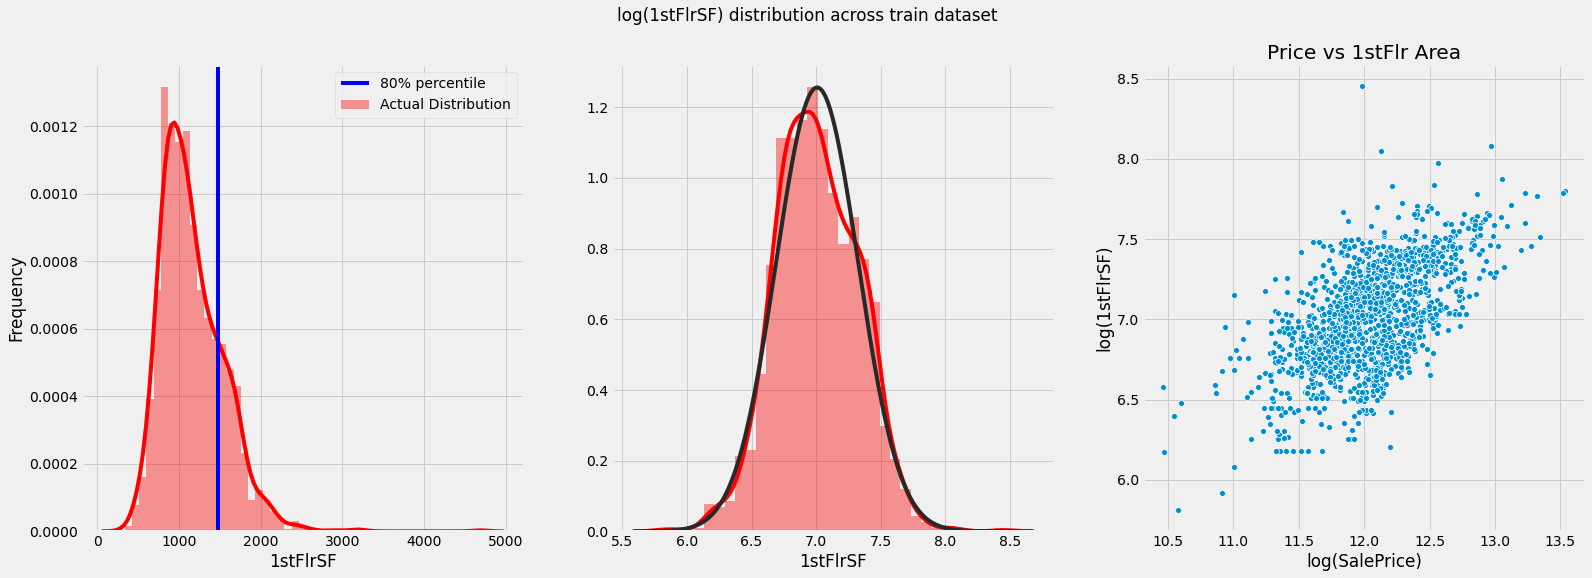

Above Distribution has 1.38 skewness values
Above Distribution has 5.75 kurtosis values
Pearson Correlation between Price and 1stFlr Area is 0.6089466549036314
Spearman Correlation between Price and 1stFlr Area is 0.5754078354212824


In [7]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
sns.distplot(train['1stFlrSF']
                ,color = 'r',label = "Actual Distribution")

plt.axvline(np.percentile(train['1stFlrSF'],80),color = 'blue',label = "80% percentile")

skewness = np.round(train['1stFlrSF'].skew(),2)
kurtosis = np.round(train['1stFlrSF'].kurt(),2)

plt.ylabel("Frequency")
plt.suptitle(f"log(1stFlrSF) distribution across train dataset")
plt.legend()

plt.subplot(1,3,2)
sns.distplot(np.log(train['1stFlrSF'])
                ,color = 'r',label = "Normal Distribution",fit = norm)
# stats.probplot(np.log(train['1stFlrSF']),plot = plt)

plt.subplot(1,3,3)

sns.scatterplot(train['log(Price)'],np.log(train['1stFlrSF']))
plt.xlabel("log(SalePrice)")
plt.ylabel("log(1stFlrSF)")
cor = stats.pearsonr(train['log(Price)'],np.log(train['1stFlrSF']))
spear_cor = stats.spearmanr(train['log(Price)'],np.log(train['1stFlrSF']))
plt.title("Price vs 1stFlr Area")

plt.show()


print(f"Above Distribution has {skewness} skewness values")
print(f"Above Distribution has {kurtosis} kurtosis values")
print(f"Pearson Correlation between Price and 1stFlr Area is {cor[0]}")
print(f"Spearman Correlation between Price and 1stFlr Area is {spear_cor[0]}")

## Above set of plots do tell us some story right !!!!

We can definitely concludes that 1stFlr Area feature has good relationship with SalePrice. The correlation of log of Price and 1stFlr Area features is pretty good.

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


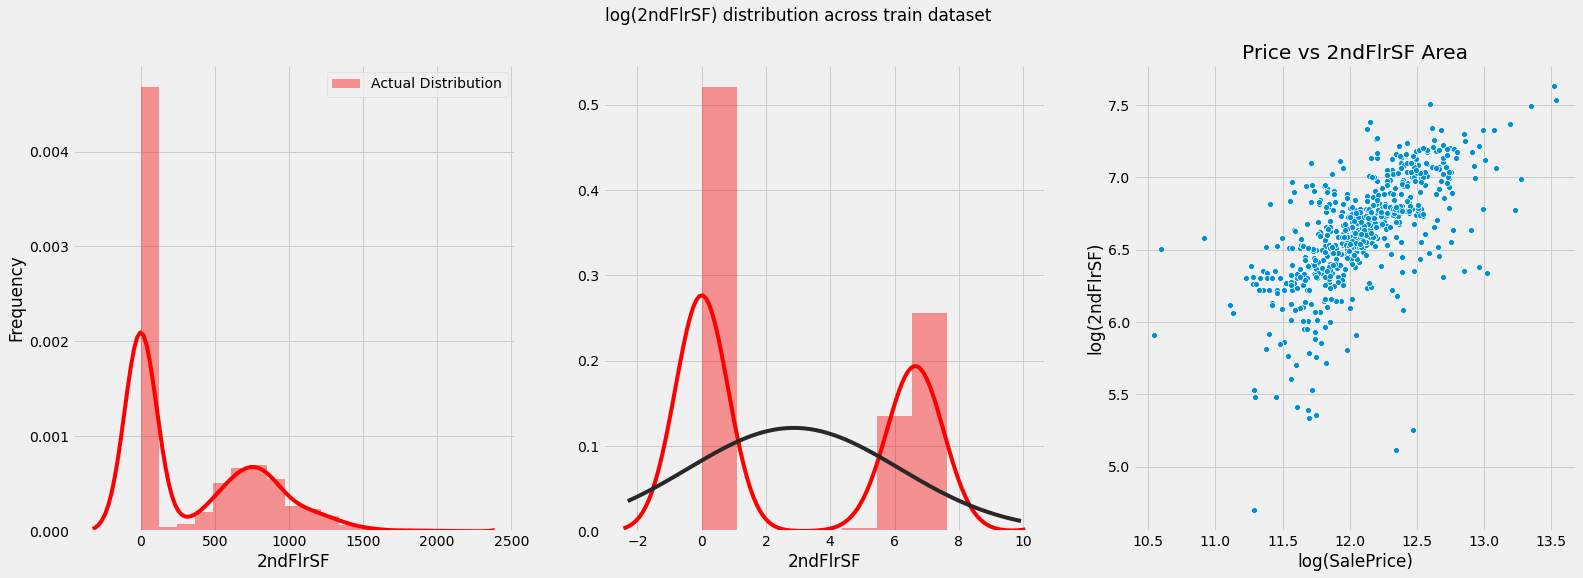

Above Distribution has 0.81 skewness values
Above Distribution has -0.55 kurtosis values
Pearson Correlation between Price and 2ndFlr Area is 0.18077789312686354
Spearman Correlation between Price and 2ndFlr Area is 0.29359798822238187


In [8]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
sns.distplot(train['2ndFlrSF']
                ,color = 'r',label = "Actual Distribution")

skewness = np.round(train['2ndFlrSF'].skew(),2)
kurtosis = np.round(train['2ndFlrSF'].kurt(),2)

plt.ylabel("Frequency")
plt.suptitle(f"log(2ndFlrSF) distribution across train dataset")
plt.legend()

plt.subplot(1,3,2)
sns.distplot(np.log1p(train['2ndFlrSF'])
                ,color = 'r',label = "Normal Distribution",fit = norm)
# stats.probplot(np.log(train['1stFlrSF']),plot = plt)

plt.subplot(1,3,3)

sns.scatterplot(train['log(Price)'],np.log(train['2ndFlrSF']))
plt.xlabel("log(SalePrice)")
plt.ylabel("log(2ndFlrSF)")
cor = stats.pearsonr(train['log(Price)'],np.log1p(train['2ndFlrSF']))
spear_cor = stats.spearmanr(train['log(Price)'],np.log1p(train['2ndFlrSF']))
plt.title("Price vs 2ndFlrSF Area")

plt.show()


print(f"Above Distribution has {skewness} skewness values")
print(f"Above Distribution has {kurtosis} kurtosis values")
print(f"Pearson Correlation between Price and 2ndFlr Area is {cor[0]}")
print(f"Spearman Correlation between Price and 2ndFlr Area is {spear_cor[0]}")

1. Well some of the values in 2ndFlr Area features is 0, this might be because there is no 2nd floor in that house.

2. Relationship between Price and 2ndFlr area also not good as compare to 1stFlr area.

3. Looking into above plots we can say that it's a bimodal distribution i.e it is having two modes one at very lower end close to zero because there are many samples having zero as values (no 2nd floor). If we remove those 0 values samples ( just for exploration) let's see how the distribution comes out to be.

## This going to be so........... interesting to see how this 2ndFlr Area feature behave when we remove samples with zero values.

## Spolier Alert !!! It's going to be very intutive 

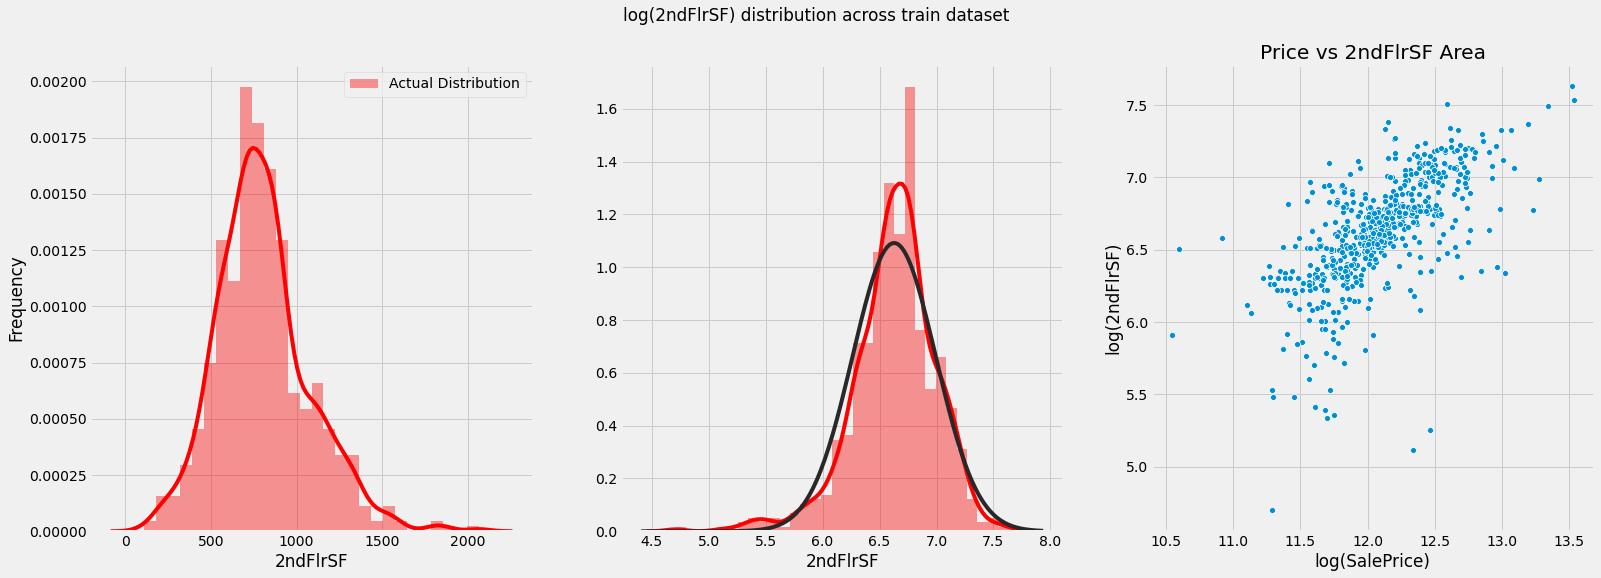

Above Distribution has 0.7 skewness values
Above Distribution has 1.29 kurtosis values
Pearson Correlation between Price and 2ndFlr Area is 0.646975296750461
Spearman Correlation between Price and 2ndFlr Area is 0.6973364574250541


In [9]:
sample = train[train['2ndFlrSF']!=0]

plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
sns.distplot(sample['2ndFlrSF']
                ,color = 'r',label = "Actual Distribution")

skewness = np.round(sample['2ndFlrSF'].skew(),2)
kurtosis = np.round(sample['2ndFlrSF'].kurt(),2)

plt.ylabel("Frequency")
plt.suptitle(f"log(2ndFlrSF) distribution across train dataset")
plt.legend()

plt.subplot(1,3,2)
sns.distplot(np.log1p(sample['2ndFlrSF'])
                ,color = 'r',label = "Normal Distribution",fit = norm)
# stats.probplot(np.log(train['1stFlrSF']),plot = plt)

plt.subplot(1,3,3)

sns.scatterplot(sample['log(Price)'],np.log(sample['2ndFlrSF']))
plt.xlabel("log(SalePrice)")
plt.ylabel("log(2ndFlrSF)")
cor = stats.pearsonr(sample['log(Price)'],np.log1p(sample['2ndFlrSF']))
spear_cor = stats.spearmanr(sample['log(Price)'],np.log1p(sample['2ndFlrSF']))
plt.title("Price vs 2ndFlrSF Area")

plt.show()


print(f"Above Distribution has {skewness} skewness values")
print(f"Above Distribution has {kurtosis} kurtosis values")
print(f"Pearson Correlation between Price and 2ndFlr Area is {cor[0]}")
print(f"Spearman Correlation between Price and 2ndFlr Area is {spear_cor[0]}")

## Isn't it intriguing the way our resultant plot transformed to be a insight data. 

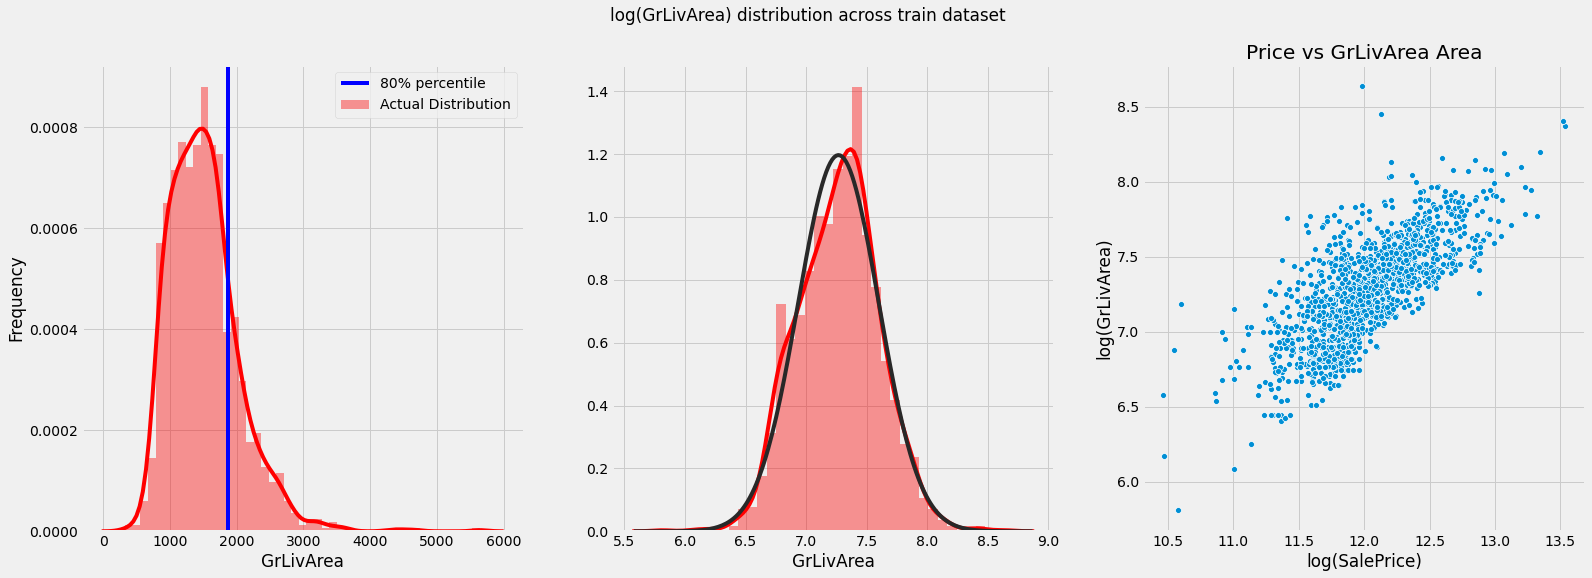

Above Distribution has 1.37 skewness values
Above Distribution has 4.9 kurtosis values
Pearson Correlation between Price and GrLivArea is 0.730254851198229
Spearman Correlation between Price and GrLivArea is 0.7313095834659141


In [10]:
plt.figure(figsize = (24,8))
plt.subplot(1,3,1)
sns.distplot(train['GrLivArea']
                ,color = 'r',label = "Actual Distribution")
plt.axvline(np.percentile(train['GrLivArea'],80),color = 'blue',label = "80% percentile")

skewness = np.round(train['GrLivArea'].skew(),2)
kurtosis = np.round(train['GrLivArea'].kurt(),2)

plt.ylabel("Frequency")
plt.suptitle(f"log(GrLivArea) distribution across train dataset")
plt.legend()

plt.subplot(1,3,2)
sns.distplot(np.log(train['GrLivArea'])
                ,color = 'r',label = "Normal Distribution",fit = norm)
# stats.probplot(np.log(train['1stFlrSF']),plot = plt)

plt.subplot(1,3,3)

sns.scatterplot(train['log(Price)'],np.log(train['GrLivArea']))
plt.xlabel("log(SalePrice)")
plt.ylabel("log(GrLivArea)")
cor = stats.pearsonr(train['log(Price)'],np.log(train['GrLivArea']))
spear_cor = stats.spearmanr(train['log(Price)'],np.log(train['GrLivArea']))
plt.title("Price vs GrLivArea Area")

plt.show()



print(f"Above Distribution has {skewness} skewness values")
print(f"Above Distribution has {kurtosis} kurtosis values")
print(f"Pearson Correlation between Price and GrLivArea is {cor[0]}")
print(f"Spearman Correlation between Price and GrLivArea is {spear_cor[0]}")

## Great it turnsout that GrliveArea is the most important then above all features for predicting SalePrice. Nice Going ........

### In my perspective, heatmap is the best way to have a look at different correlation without going through all the troubles.......

### Below, I have visualization which shows top 10 (including SalePrice) features having highest correlation.

# Alert!! 

## Before finding top 10 correlation drop newly created features...

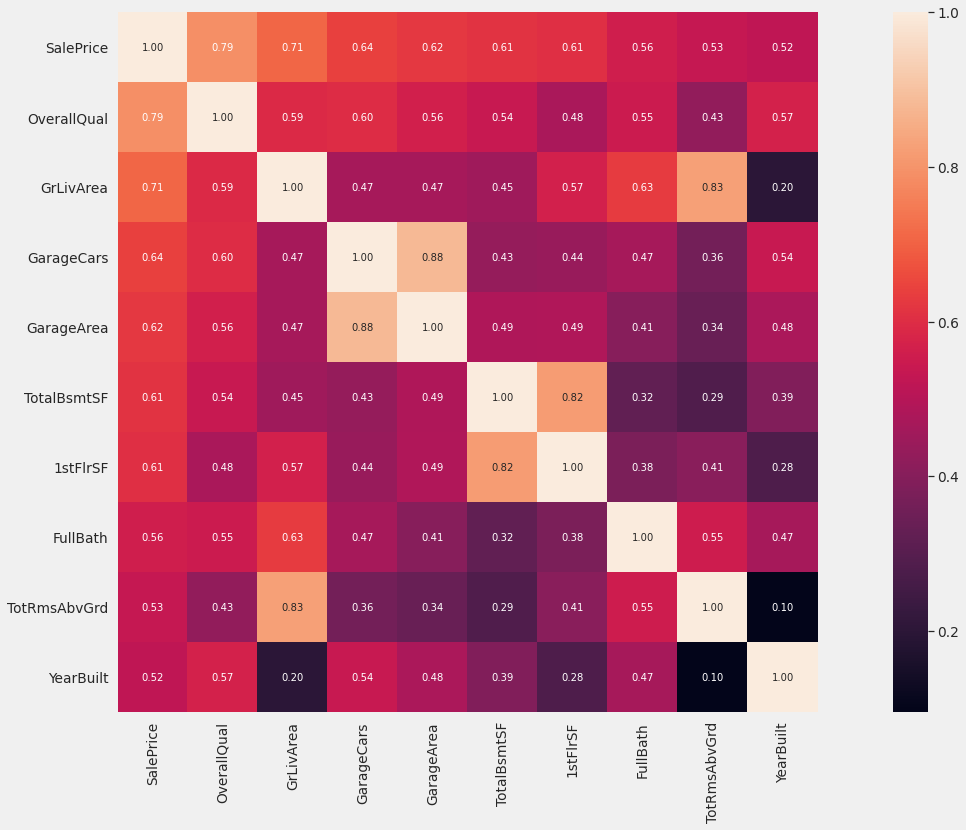

In [11]:
#saleprice correlation matrix

col_drop = ["log(Price)"]
plt.figure(figsize = (24,12))
k = 10 #number of variables for heatmap

cols = train.drop(col_drop,axis=1).corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train.drop(col_drop,axis=1)[cols].values.T)
sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Have a look at some categorical features

### Year Built Features should have nice correlation with SalePrice

### We generally prefer to buy house which has been recently contructed and that's why as Year increases SalePrice of House Increases.

### But we might see some earlier constructed building to be more costly then present. Because some of use definitely likes antique pieces.

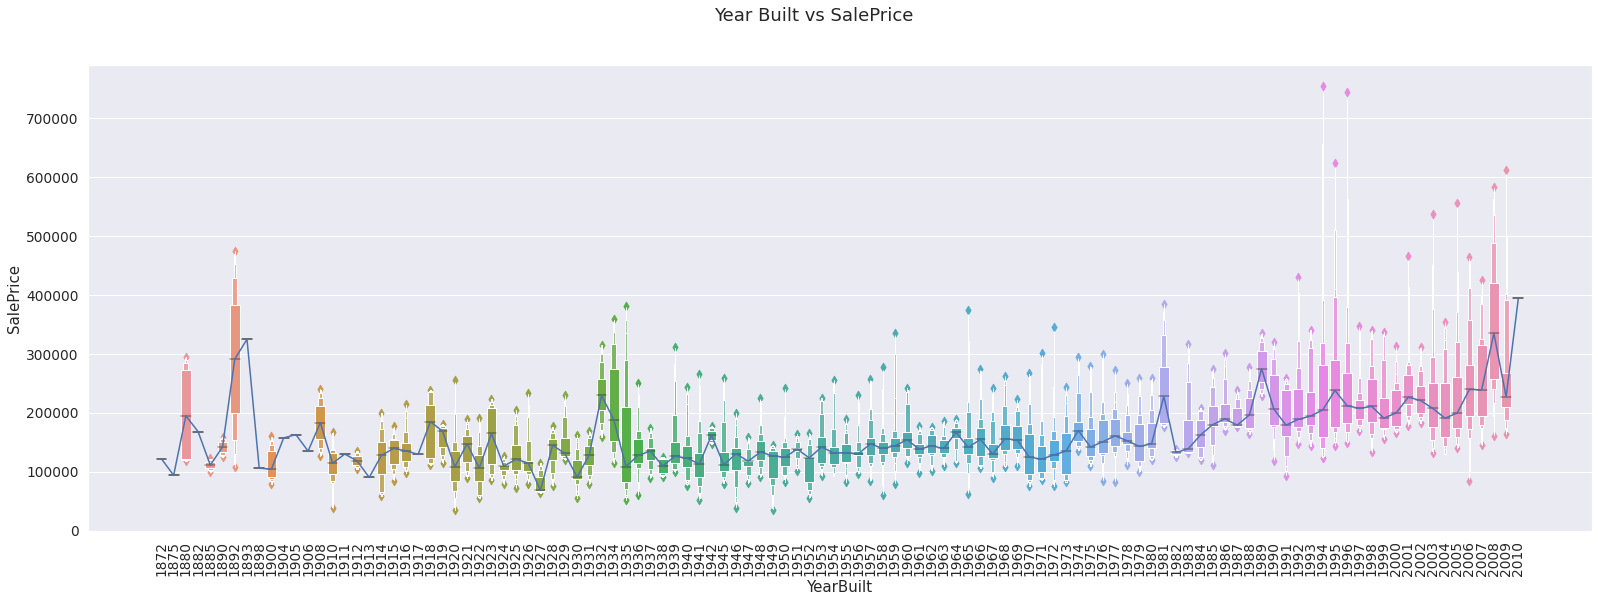

In [12]:
fig,ax = plt.subplots(figsize = (24,8))

temp = train.groupby('YearBuilt')['SalePrice'].median()
sns.boxenplot(x = train['YearBuilt'],y = train['SalePrice'],ax = ax)
#sns.lineplot(y = temp.values,x = temp.index,ax = ax)
ax.plot(temp.values)
plt.xticks(rotation = 90)
plt.suptitle("Year Built vs SalePrice")
plt.show()

## Next two categorical features we are going to exxplore is OverallQual and OverallCond....

## I don't think anyone will have any doubt regarding these features correlation with SalePrice......

## well definetly we are going to see positive relation is it???? .........Can't Wait..... then let's dive in ................

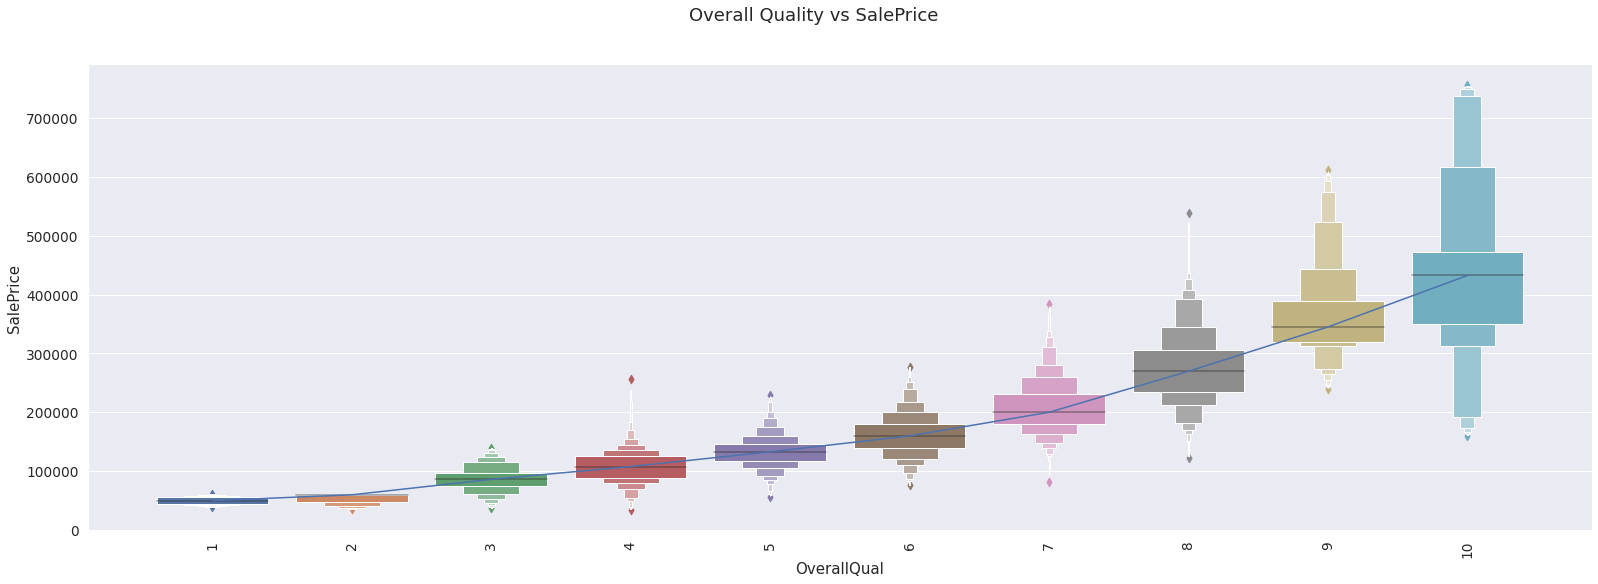

In [13]:
fig,ax = plt.subplots(figsize = (24,8))

temp = train.groupby('OverallQual')['SalePrice'].median()
sns.boxenplot(x = train['OverallQual'],y = train['SalePrice'],ax = ax)
#sns.lineplot(y = temp.values,x = temp.index,ax = ax)
ax.plot(temp.values)
plt.xticks(rotation = 90)
plt.suptitle("Overall Quality vs SalePrice")
plt.show()

## Well as expected Quality of House Increases Sale Price Increases..........  No Doubt right.........Let See if you are clear with the below result...

## Get Ready for Shocking Result..........................

<img src = "https://tenor.com/view/friends-oh-my-eyes-my-eyes-gif-10973109.gif" width = "500px" height = "200px">

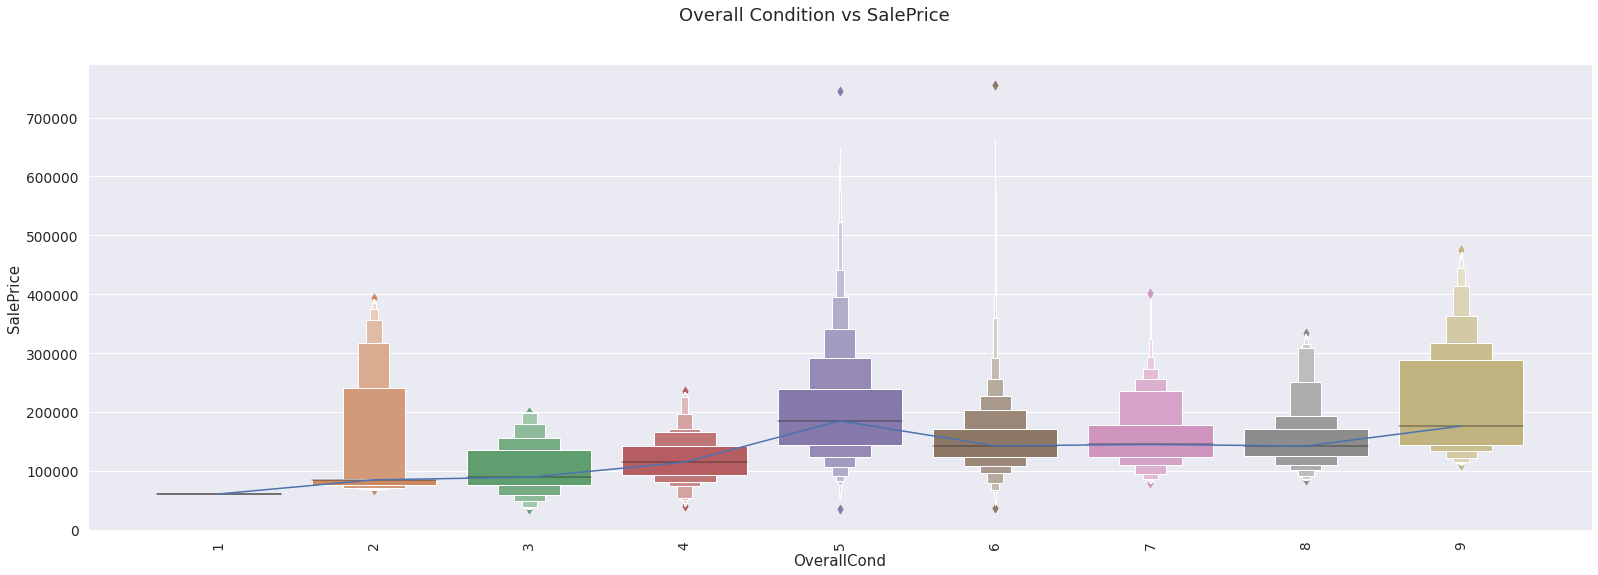

In [14]:
fig,ax = plt.subplots(figsize = (24,8))

temp = train.groupby('OverallCond')['SalePrice'].median()
sns.boxenplot(x = train['OverallCond'],y = train['SalePrice'],ax = ax)
#sns.lineplot(y = temp.values,x = temp.index,ax = ax)
ax.plot(temp.values)
plt.xticks(rotation = 90)
plt.suptitle("Overall Condition vs SalePrice")
plt.show()

## Well to be frank I couldn't understand why OverallCond value 5 has high median then all of it......... Certainly Quality and Condition may be different things in this dataset (but how???? isn't it the synonym of each other!!! certainly not here......).

## What I can conclude here is that there are certains features Condition1 and Condition2 in the dataset which might be contributing towards the calculation of OverallCond rating of each House............


## What else might be the reason...... I can't think of another reason if you know feel free to shoot in the **comment section**.........

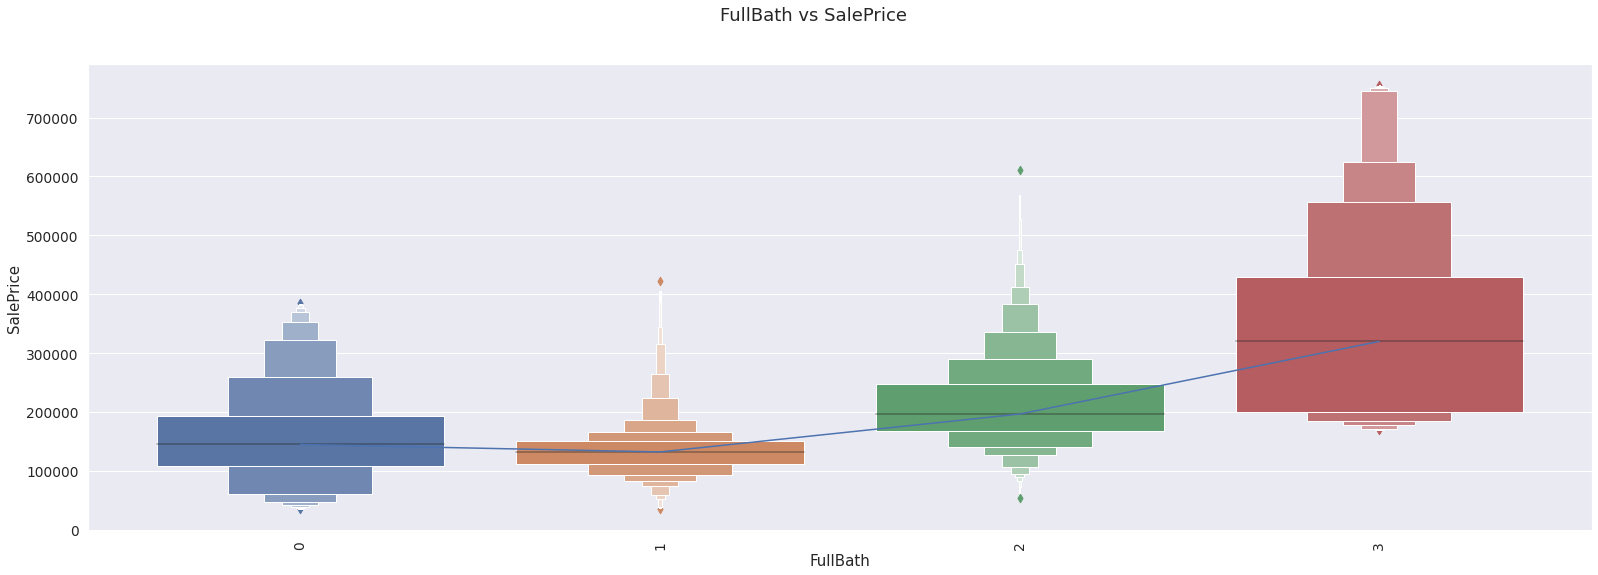

In [15]:
fig,ax = plt.subplots(figsize = (24,8))

temp = train.groupby('FullBath')['SalePrice'].median()
sns.boxenplot(x = train['FullBath'],y = train['SalePrice'],ax = ax)
#sns.lineplot(y = temp.values,x = temp.index,ax = ax)
ax.plot(temp.values)
plt.xticks(rotation = 90)
plt.suptitle("FullBath vs SalePrice")
plt.show()

## Confused!!! How can fullbath features be so important contributor for SalePrice.....Really!!!!!!!!!!!!!!

# Let's fill in missing values and Embark a journey of creating a Model

### First Let's find out % of missing values in each features...

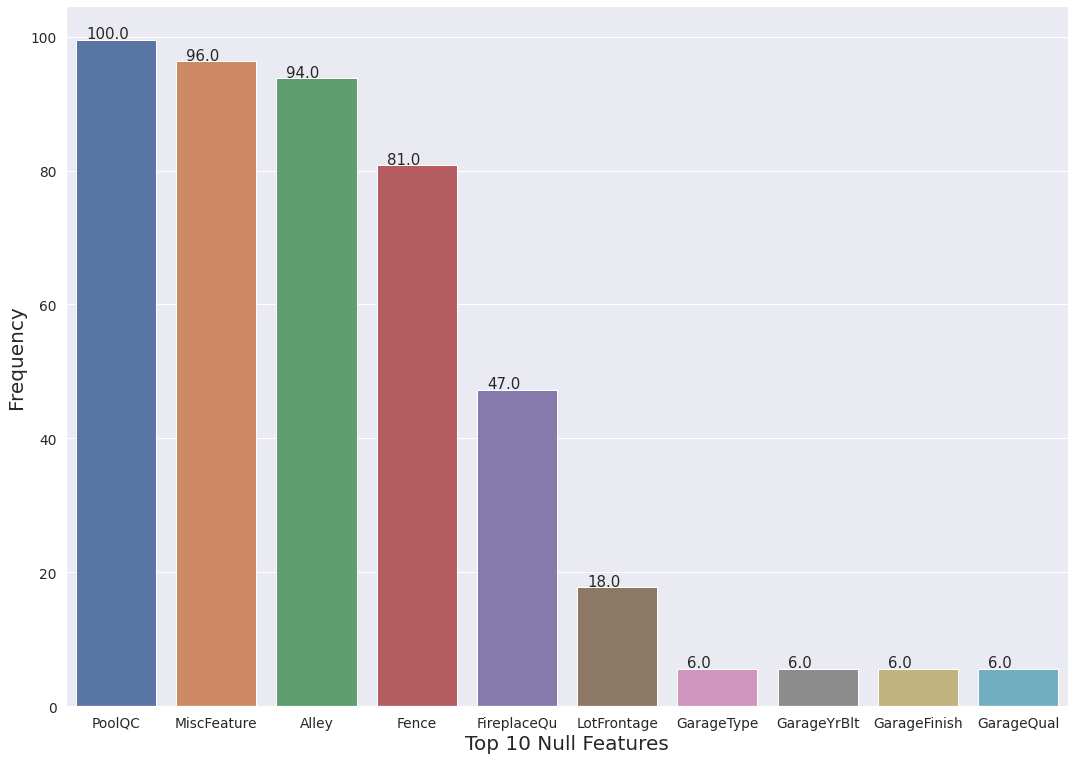

In [16]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
keys,value = [],[]
for i in range(len(df_miss[:10])):
    keys.append(df_miss[i][0])
    value.append(df_miss[i][1])
# let's see the distribution of missing values

plt.figure(figsize = (16,12))
ax = sns.barplot(x = keys,y = value)

rects = ax.patches

for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + 0.1,height + 2, str (np.round(height,0)), ha = 'left',va = 'top')



plt.xlabel("Top 10 Null Features",fontsize = 20)
plt.ylabel("Frequency",fontsize = 20)
plt.show()

## There is certain features having dtype as int but it should be object or string type. Let's convert them.........

In [17]:
def convert_dtype(data):
    data['MSSubClass'] = data['MSSubClass'].apply(str)
    data['YrSold'] = data['YrSold'].astype(str)
    data['MoSold'] = data['MoSold'].astype(str)
    return(data)
train = convert_dtype(train)
test = convert_dtype(test)
print(train.shape)
print(test.shape)

(1460, 82)
(1459, 80)


## Let's fill in the missing values

In [18]:
def handle_missing(data):
    
    # the data description states that NA refers to typical ('Typ') values
    data['Functional'] = data['Functional'].fillna('Typ')
    
    # Replace the missing values in each of the columns below with their mode
    data['Electrical'] = data['Electrical'].fillna("SBrkr")
    data['KitchenQual'] = data['KitchenQual'].fillna("TA")
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
    data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    
    # the data description stats that NA refers to "No Pool"
    data["PoolQC"] = data["PoolQC"].fillna("None")
    
    
    # Replacing the missing values with 0, since no garage = no cars in garage
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data[col] = data[col].fillna(0)
    
    # Replacing the missing values with None
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        data[col] = data[col].fillna('None')
    
    # NaN values for these categorical basement features, means there's no basement
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[col] = data[col].fillna('None')
        
    # Group the by neighborhoods, and fill in missing value by the median LotFrontage of the neighborhood
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # We have no particular intuition around how to fill in the rest of the categorical features
    
    # So we replace their missing values with None
    objects = []
    for i in data.columns:
        if data[i].dtype == object:
            objects.append(i)
    data.update(data[objects].fillna('None'))
        
    # And we do the same thing for numerical features, but this time with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in data.columns:
        if data[i].dtype in numeric_dtypes:
            numeric.append(i)
    data.update(data[numeric].fillna(0))    
    return data

train = handle_missing(train)
test = handle_missing(test)
print(train.shape)
print(test.shape)

(1460, 82)
(1459, 80)



## so we have no missing values now...cooool...But we are still not done we have some numerical features that has to be handled and some feature engineering needs to be done....

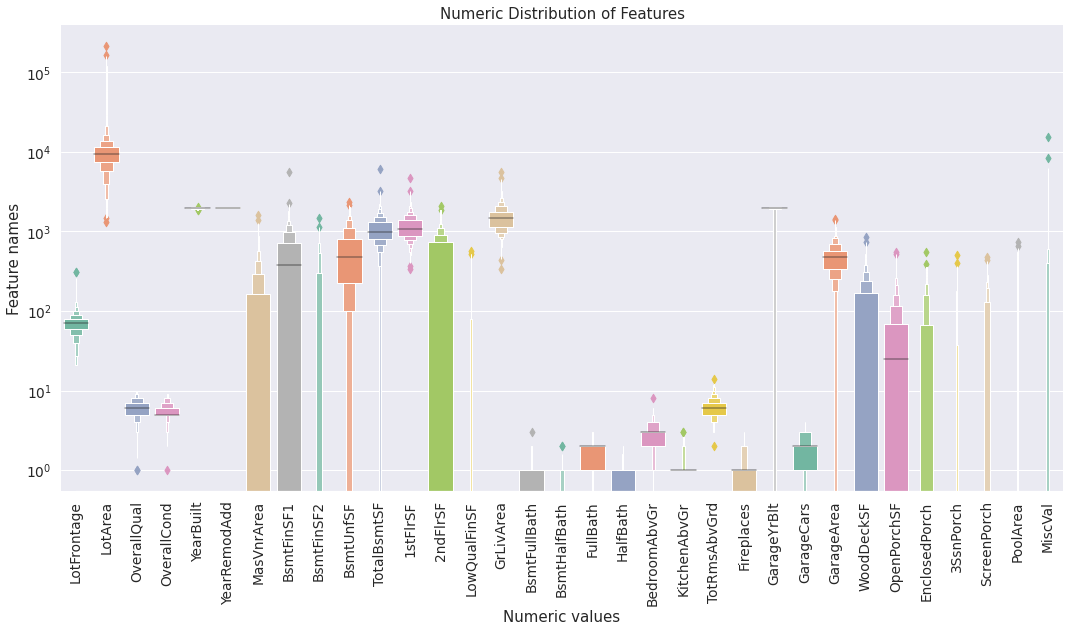

In [19]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in train.drop(['Id','SalePrice','log(Price)'],axis=1).columns:
    if train[i].dtype in numeric_dtypes:
        numeric.append(i)
        
def find_skewness(data):
    skew = {}
    for col in data.columns:
        skewness = np.round(data[col].skew(),3)
        skew[col] = skewness
    return(skew)

skew_data = find_skewness(train[numeric]) 
skew_data = dict(sorted(skew_data.items(), key=lambda x: x[1], reverse=True))

f, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale("log")
ax = sns.boxenplot(data = train[numeric], orient="v", palette="Set2")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
plt.xticks(rotation = 90)
sns.despine(trim=True, left=True)

## Below we have applied BoxCox transformation for each numerical features...when we input the feature values to boxcox function it return lambda values which we will use to transform each non-gaussian distribution to gaussian distribution......

## Point to Remember: Not all numerical features is converted to gaussian distribution.....it tries to convert features such that it approximate normal distribution.........

In [22]:
for i in list(skew_data.keys())[:5]:
    train[i] = stats.boxcox(train[i]+1
                            , stats.boxcox_normmax(train[i] + 1))

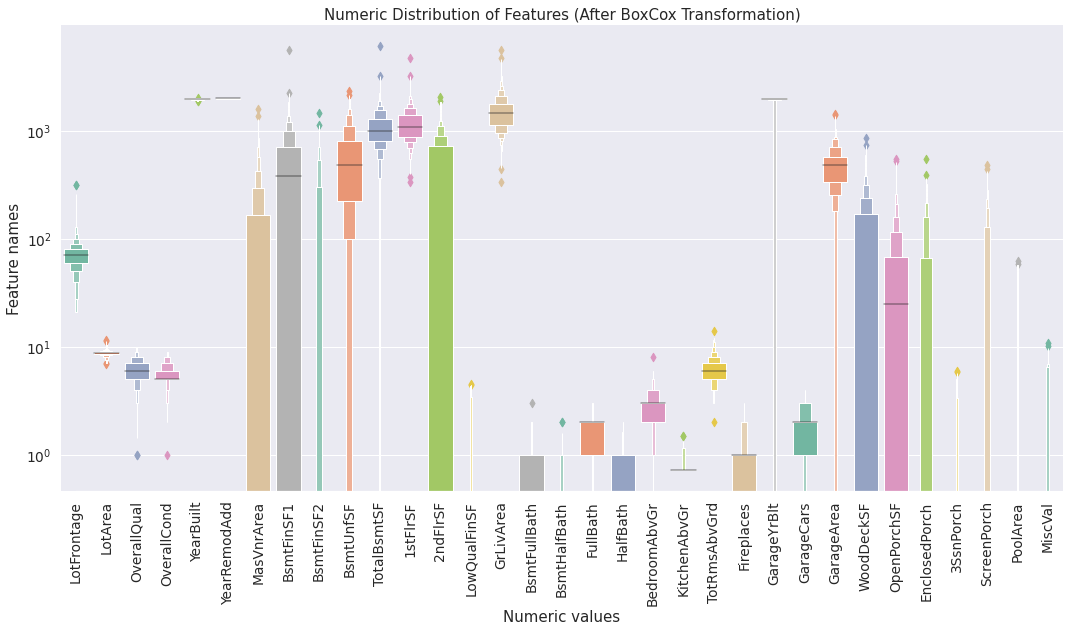

In [23]:
skew_data = find_skewness(train[numeric]) 
skew_data = dict(sorted(skew_data.items(), key=lambda x: x[1], reverse=True))

f, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale("log")
ax = sns.boxenplot(data = train[numeric], orient="v", palette="Set2")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features (After BoxCox Transformation)")
plt.xticks(rotation = 90)
sns.despine(trim=True, left=True)

In [24]:
numeric = []
for i in test.drop(['Id'],axis=1).columns:
    if test[i].dtype in numeric_dtypes:
        numeric.append(i)
skew_data = find_skewness(test[numeric]) 
skew_data = dict(sorted(skew_data.items(), key=lambda x: x[1], reverse=True))
for i in list(skew_data.keys())[:5]:
    test[i] = stats.boxcox(test[i]+1
                            , stats.boxcox_normmax(test[i] + 1))
    
print(train.shape)
print(test.shape)

(1460, 82)
(1459, 80)


## Now let's Create some intresting features which might help our model to understand some complex patterns

In [25]:
def new_features(data):
    
    data['BsmtFinType1_Unf'] = 1*(data['BsmtFinType1'] == 'Unf')
    data['HasWoodDeck'] = (data['WoodDeckSF'] == 0) * 1
    data['HasOpenPorch'] = (data['OpenPorchSF'] == 0) * 1
    data['HasEnclosedPorch'] = (data['EnclosedPorch'] == 0) * 1
    data['Has3SsnPorch'] = (data['3SsnPorch'] == 0) * 1
    data['HasScreenPorch'] = (data['ScreenPorch'] == 0) * 1
    data['YearsSinceRemodel'] = data['YrSold'].astype(int) - data['YearRemodAdd'].astype(int)
    data['Total_Home_Quality'] = data['OverallQual'] + data['OverallCond']
    data = data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']

    data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                     data['1stFlrSF'] + data['2ndFlrSF'])
    data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                                   data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))
    data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                                  data['EnclosedPorch'] + data['ScreenPorch'] +
                                  data['WoodDeckSF'])
    
    
    # below transformation is for each bimodal distribution 
    
    data['TotalBsmtSF'] = data['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    data['2ndFlrSF'] = data['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
    data['GarageArea'] = data['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
    data['GarageCars'] = data['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
    data['LotFrontage'] = data['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
    data['MasVnrArea'] = data['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
    data['BsmtFinSF1'] = data['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
    
    # boolean features

    data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    return(data)
train = new_features(train)
test = new_features(test)
print(train.shape)
print(test.shape)

(1460, 97)
(1459, 95)


In [26]:
def log_square_features(data):
    log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                     'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                     'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                     'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                     'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']

    for col in log_features:
        data['log('+col+')'] = np.log(1.01+data[col])

    squared_features = ['log(LotFrontage)', 
                  'log(TotalBsmtSF)', 'log(1stFlrSF)', 'log(2ndFlrSF)', 'log(GrLivArea)',
                  'log(GarageCars)', 'log(GarageArea)']

    for col in squared_features:
        data['Square_'+col] = data[col]*data[col]
    return(data)

train = log_square_features(train)
test = log_square_features(test)
print(train.shape)
print(test.shape)

(1460, 134)
(1459, 132)


## Categorical Features Encoding

In [27]:
train.drop(['Id'],axis=1,inplace = True)
test.drop(['Id'],axis=1,inplace = True)

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train.drop(['SalePrice','log(Price)'],axis=1),train[['SalePrice','log(Price)']],test_size = 0.05,random_state = 42)
print(f"Train data has shape {X_train.shape}")
print(f"Test data has shape {X_test.shape}")

Train data has shape (1387, 131)
Test data has shape (73, 131)


## The reason why we are not doing applying Dummy function here because when we apply this function individually on train and test data this may lead to different feature vector dimension becuase of different number of unqiue varaible in features..........Confusing ... let's narrow it down one simple example

## Let's consider we have applied Dummy Variable for feature 'A' which contains 5 unqiue variables (here we are talking about train data). This will create 5 new features (each feature containing boolean values) and now let's say if apply Dummy function on test data for same feature 'A' but this time it contains 6 variable i.e One extra variable, which will create 6 different features.

## So here now problem arise our Model has been trained for 5 feature vector space and will be expecting 5 dimension vector on test data but here it contains 6 vector dimension....then boooom...... Error will showed up........

## I hope you get it why it's not safe to use dummy variable...

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
obj_col = []
num_col = []
for col in X_train.columns:
    if X_train[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

temp1 = pd.DataFrame()
temp2 = pd.DataFrame()
temp3 = pd.DataFrame()
error = []       
for i in tqdm(range(len(obj_col))):
    try:
        vec = CountVectorizer(stop_words=[])
        vec.fit(X_train[obj_col[i]])
        X1 = vec.transform(X_train[obj_col[i]])
        X2 = vec.transform(X_test[obj_col[i]])
        X3 = vec.transform(test[obj_col[i]])
    except: 
        error.append(obj_col[i])
        continue
    
    feature_name = []
    for f in vec.get_feature_names():
        feature_name.append('f'+str(i)+'_'+f)
        
    X1 = pd.DataFrame(X1.toarray(),columns = feature_name)
    X2 = pd.DataFrame(X2.toarray(),columns = feature_name)
    X3 = pd.DataFrame(X3.toarray(),columns = feature_name)
    temp1 = pd.concat([temp1,X1],axis=1)
    temp2 = pd.concat([temp2,X2],axis=1)
    temp3 = pd.concat([temp3,X3],axis=1)

100%|██████████| 43/43 [00:00<00:00, 48.00it/s]


In [34]:
X_train = X_train[num_col]
X_test = X_test[num_col]
test = test[num_col]
print(X_train.shape)
print(X_test.shape)
print(test.shape)

(1387, 88)
(73, 88)
(1459, 88)


In [35]:
X_train = pd.concat([X_train,temp1],axis=1)
X_test = pd.concat([X_test,temp2],axis=1)
test = pd.concat([test,temp3],axis=1)
print(X_train.shape)
print(X_test.shape)
print(test.shape)

(1387, 88)
(73, 88)
(1459, 88)


In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from mlxtend.regressor import StackingRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

## Let's Define Performance Metric

In [37]:
def rmse(y_true,y_pred):
    return(np.sqrt(mean_squared_error(y_true,y_pred)))

## Scaling 

## Let's just bee clear here, Scaling is done most importantly for the algorithms which use distance metric for segregating points but In other case Tree based algorithms used splitting techniques.

## If we scaled the input for Tree based algorithms , the result won't change........ 

In [38]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_tr = robust_scaler.transform(X_train)
X_ts = robust_scaler.transform(X_test)
test = robust_scaler.transform(test)

## Below we are going to create 5 models including stacked model.........

1. Ridge Regression
2. LightGBM
3. Random Forest
4. Gradient Boosting DT
5. Stacked (of all above)

## Then we will have weighted prediction based on which model above perform well...................


## Ridge Regressor

In [39]:
%%time
ridge = Ridge()
param_dist = {'alpha':[1e-5,9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5,10,12,15,20,30,50],
              'solver':['auto','svd','lsqr','cholesky','saga']}

clf = GridSearchCV(ridge,
                   param_grid=param_dist,
                   cv=5,
                   return_train_score=True,
                   scoring = 'neg_mean_squared_error')

clf.fit(X_tr,y_train['log(Price)'].values)

CPU times: user 1min 39s, sys: 641 ms, total: 1min 39s
Wall time: 1min 17s


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0009, 0.0007, 0.0005, 0.0003,
                                   0.0001, 0.001, 0.05, 0.01, 0.1, 0.3, 1, 3, 5,
                                   10, 12, 15, 20, 30, 50],
                         'solver': ['auto', 'svd', 'lsqr', 'cholesky', 'saga']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
ridge = clf.best_estimator_ #Ridge(alpha = 12,solver = 'svd')
ridge.fit(X_tr,y_train['log(Price)'].values)
pred = ridge.predict(X_ts)

print("RMSE score for test data is :",rmse(y_test['log(Price)'].values,pred))

RMSE score for test data is : 0.10768432334847262


## RandomForest Regressor

In [41]:
rfg = RandomForestRegressor(n_estimators=500,
                          max_depth=30,
                          min_samples_split=2,
                          min_samples_leaf=2,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
rfg.fit(X_tr,y_train['log(Price)'].values)
pred = rfg.predict(X_ts)
print("RMSE score for test data is :",rmse(y_test['log(Price)'].values,pred))

RMSE score for test data is : 0.11590479753064599


## Light GBM

In [42]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.002, 
                       n_estimators=10000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

lightgbm.fit(X_tr,y_train['log(Price)'].values)
pred = lightgbm.predict(X_ts)
print("RMSE score for test data is :",rmse(y_test['log(Price)'].values,pred))

RMSE score for test data is : 0.10770566666412422


## GradientBoostingRegressor

In [43]:
gbr = GradientBoostingRegressor(n_estimators=2000,
                                learning_rate=0.005,
                                max_depth=5,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

gbr.fit(X_tr,y_train['log(Price)'].values)
pred = gbr.predict(X_ts)
print("RMSE score for test data is :",rmse(y_test['log(Price)'].values,pred))

RMSE score for test data is : 0.10636605836347236


## Stacked Regressor

In [44]:
stack_gen = StackingRegressor(regressors=(lightgbm, gbr, rfg),
                                meta_regressor=gbr)
stack_gen.fit(X_tr,y_train['log(Price)'].values)
pred = stack_gen.predict(X_ts)
print("RMSE score for test data is :",rmse(y_test['log(Price)'].values,pred))

RMSE score for test data is : 0.11522937946593377


In [45]:
def ensemble(data):
    return( 0.3*gbr.predict(data) + 
          0.2*lightgbm.predict(data) + 
         0.1*stack_gen.predict(data) + 0.1*rfg.predict(data)+ 0.3*ridge.predict(data))

rmse(y_test['log(Price)'].values,ensemble(X_ts))

0.10322107589388571

In [46]:
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
# submission['SalePrice'] = (np.exp(gbr.predict(test)) + np.exp(lightgbm.predict(test)) + np.exp(stack_gen.predict(test)) + np.exp(rfg.predict(test))+ np.exp(ridge.predict(test)))/5
submission['SalePrice'] = 0.20*np.exp(gbr.predict(test)+0.0) +  0.25*np.exp(lightgbm.predict(test)) +  0.35*np.exp(stack_gen.predict(test)) + 0.2*np.exp(rfg.predict(test))

## Avoid doing data leakage............ while creating a model it's pretty obvious for someone accidently share information of test data with model................ This really mislead our model.

## So, This concludes my work. Thank you for reading it............ I hope you enjoyed it.......... pls do upvote....
